In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mne.stats import fdr_correction
import numpy as np

# Import R libraries for statistical models
% reload_ext rpy2.ipython
%R library(lsmeans)
%R library(afex)
%R library(effsize)

array(['effsize', 'bindrcpp', 'lsr', 'dplyr', 'afex', 'lsmeans', 'lme4',
       'Matrix', 'emmeans', 'tools', 'RevoUtils', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], dtype='<U9')

# Import data

In [7]:
recall     = pd.read_csv('data/Recall.csv', sep = ',')
intrusions = pd.read_csv('data/Intrusions.csv', sep = ';')
emotion    = pd.read_csv('data/Emotion.csv', sep = ';')

# Ploting functions for Intrusions and recall

In [11]:
def plot_recall(group):
    if group == 1:
        pal = ['#916ab7', '#c49b6a', '#444444']
    else:
        pal = ['#916ab7', '#444444']
        
    plt.rcParams['figure.figsize'] = [5.0, 6.0]
    sns.set_context("paper", font_scale=2.5)

    #Recall
    ax = sns.factorplot(x="Condition", 
                  y="Recall", 
                  hue="Emotion", 
                  size=6,
                  dodge=0.1,
                  scale = 1.5,
                  ci=68,
                  legend = True,
                  legend_out=False,
                  linewidth = 12,
                  capsize=.2,
                  palette = pal,
                  data=recall[recall.Group == group])

    plt.ylim([70, 100])
    sns.despine(offset=10, trim=True)
    plt.ylabel('Recall (%)', size = 25, fontweight = 'bold')
    plt.xlabel('')
    plt.xticks(size = 20, fontweight = 'bold')
    plt.legend(frameon=False, 
               loc = 'upper center', 
               bbox_to_anchor=(1.1, 0.4))

def plot_intrusions(group):
   
    if group == 1:
        pal = ['#916ab7', '#c49b6a', '#444444']
    else:
        pal = ['#916ab7', '#444444']

    plt.rcParams['figure.figsize'] = [10.0, 6.0]
    sns.set_context("paper", font_scale=2.7)
    sns.tsplot(time="Sessions",
               value="Intrusions_per",
               unit='Subject',
               err_style=None,
               interpolate = None,
               legend=False,
               color = pal,
               markersize=14,
               condition="Emotion",
               data=intrusions[(intrusions.Condition == 'No-Think') & (intrusions.Group == group)])
    
    sns.tsplot(time="Sessions",
               value="Intrusions_per",
               unit='Subject',
               ci=68,
               legend=False,
               linewidth=4,
               color = pal,
               condition="Emotion",
               data=intrusions[(intrusions.Condition == 'No-Think') & (intrusions.Group == group)])
    
    plt.ylim([10, 60])
    sns.despine(offset=10, trim=True)
    plt.ylabel('Intrusions (%)', size = 28, fontweight = 'bold')
    plt.xlabel('TNT blocks', size = 28, fontweight = 'bold')
    plt.tight_layout()
    plt.show()

# Group 1 

## Recall

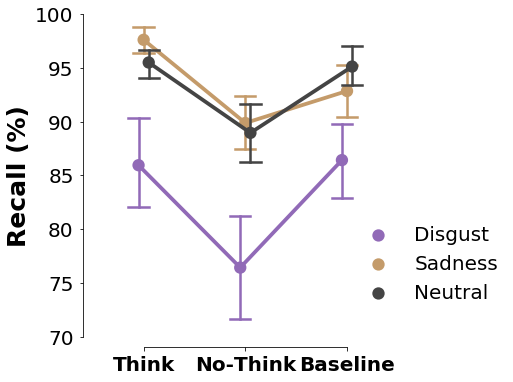

In [12]:
plot_recall(1)

### ANOVA

In [13]:
%%R -i recall -o stats

# Keep only Group 1
recall = filter(recall, Group == 1)

# ANOVA
stats = aov_ez(recall,                           
                id="Subject",                     
                dv="Recall",                         
                within=c("Emotion", "Condition"))
stats

Anova Table (Type 3 tests)

Response: Recall
             Effect          df    MSE         F  ges p.value
1           Emotion 1.32, 35.51 287.13 16.01 ***  .09  <.0001
2         Condition 1.74, 47.04 208.72   8.17 **  .05    .001
3 Emotion:Condition 2.61, 70.44 186.81      0.86 .007     .45
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


### t test

In [16]:
%%R -i recall -o stats

NT = filter(recall, Group == 1, Condition == 'No-Think', Emotion == 'Disgust')$Recall
BA = filter(recall, Group == 1, Condition == 'Baseline', Emotion == 'Disgust')$Recall

print(t.test(NT, BA, paired = T))
print(cohen.d(NT, BA, paired = T))


	Paired t-test

data:  NT and BA
t = -2.2773, df = 27, p-value = 0.03091
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -19.0100303  -0.9899697
sample estimates:
mean of the differences 
                    -10 


Cohen's d

d estimate: -0.4303643 (small)
95 percent confidence interval:
       inf        sup 
-0.9723580  0.1116294 


## Intrusions

/home/legrand/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


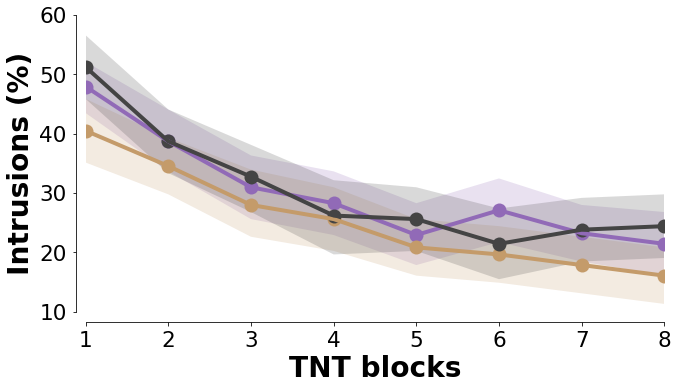

In [17]:
plot_intrusions(1)

### ANOVA

In [28]:
%%R -i intrusions -o stats
intrusions = filter(intrusions, Condition == 'No-Think')

# Keep only Group 1
Intrusions = filter(intrusions, Group == 1, Condition == 'No-Think')

# ANOVA
stats = aov_ez(intrusions,                           
                id="Subject",                     
                dv="Intrusions_per",                         
                within=c("Emotion", "Sessions"))
stats

Anova Table (Type 3 tests)

Response: Intrusions_per
            Effect           df    MSE         F  ges p.value
1          Emotion  1.60, 43.18 593.70    3.82 * .007     .04
2         Sessions  3.21, 86.62 724.90 21.00 ***  .08  <.0001
3 Emotion:Sessions 7.41, 200.10 276.18      0.78 .003     .62
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


### t test

In [19]:
%%R -i recall -o stats

dis = filter(intrusions, Group == 1, Condition == 'No-Think', Emotion == 'Disgust')%>%group_by(Subject)%>%summarise(Intrusions_per = mean(Intrusions_per))
sad = filter(intrusions, Group == 1, Condition == 'No-Think', Emotion == 'Sadness')%>%group_by(Subject)%>%summarise(Intrusions_per = mean(Intrusions_per))

print(t.test(dis$Intrusions_per, sad$Intrusions_per, paired = T))
print(cohensD(dis$Intrusions_per, sad$Intrusions_per, method = 'paired'))


	Paired t-test

data:  dis$Intrusions_per and sad$Intrusions_per
t = -2.0458, df = 27, p-value = 0.05063
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.28307917   0.01522202
sample estimates:
mean of the differences 
              -5.133929 

[1] 0.3866132


# Group 2

## Recall

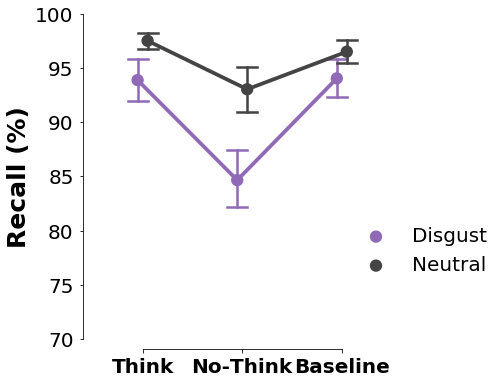

In [20]:
plot_recall(2)

### ANOVA

In [21]:
%%R -i recall -o stats

# Keep only Group 2
recall = filter(recall, Group == 2)

# ANOVA
stats = aov_ez(recall,                           
                id="Subject",                     
                dv="Recall",                         
                within=c("Emotion", "Condition"))
stats

Anova Table (Type 3 tests)

Response: Recall
             Effect          df   MSE         F ges p.value
1           Emotion       1, 23 69.08  12.17 ** .07    .002
2         Condition 1.56, 35.89 54.01 16.85 *** .11  <.0001
3 Emotion:Condition 1.44, 33.05 65.52      2.52 .02     .11
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


### t test

In [23]:
%%R -i recall -o stats

NT = filter(recall, Group == 2, Condition == 'No-Think', Emotion == 'Disgust')$Recall
BA = filter(recall, Group == 2, Condition == 'Baseline', Emotion == 'Disgust')$Recall

print(t.test(NT, BA, paired = T, alternative = 'less'))
print(cohen.d(NT, BA, method = 'paired'))


	Paired t-test

data:  NT and BA
t = -4.404, df = 23, p-value = 0.0001028
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -5.745902
sample estimates:
mean of the differences 
              -9.406566 


Cohen's d

d estimate: -0.8158123 (large)
95 percent confidence interval:
       inf        sup 
-1.4205731 -0.2110514 


/home/legrand/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


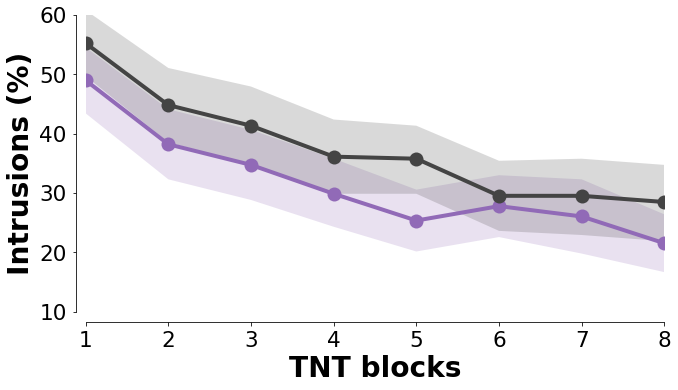

In [24]:
plot_intrusions(2)

### ANOVA

In [29]:
%%R -i intrusions -o stats

# Keep only Group 1
Intrusions = filter(intrusions, Group == 2, Condition == 'No-Think')

# ANOVA
stats = aov_ez(intrusions,
               id="Subject",
               dv="Intrusions_per",
               within=c("Emotion", "Sessions"))
stats

Anova Table (Type 3 tests)

Response: Intrusions_per
            Effect           df    MSE         F  ges p.value
1          Emotion  1.37, 37.12 305.52   9.70 **  .03    .001
2         Sessions  3.33, 90.04 207.82 19.12 ***  .08  <.0001
3 Emotion:Sessions 8.13, 219.58  89.27      1.32 .007     .23
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


# Emotional valence

## Plot

In [30]:
def plot_emotion(df, group):
    
    plt.rcParams['figure.figsize'] = [15.0, 6.0]
    sns.set_context("notebook", font_scale=2.0)
    
    # Plot
    f, ax = plt.subplots()
    
    # Show each observation with a scatterplot
    sns.stripplot(x="Emotion", y="Difference", hue="Condition",
                  data=df, 
                  dodge=True,
                  hue_order=['Think', 'No-Think', 'Baseline'], 
                  size=10,
                  alpha = 0.4,
                  linewidth=2,
                  jitter = True,
                  edgecolor = 'k',
                  palette=[sns.xkcd_rgb["medium green"],
                           sns.xkcd_rgb["pale red"],
                           sns.xkcd_rgb["denim blue"]])
    # Show means
    sns.barplot(x="Emotion", y="Difference", hue="Condition",              
                  data=df,
                  hue_order=['Think', 'No-Think', 'Baseline'], 
                  palette=[sns.xkcd_rgb["medium green"],
                           sns.xkcd_rgb["pale red"],
                           sns.xkcd_rgb["denim blue"]],
                  linewidth=2.,
                  edgecolor = [".2", ".2"],
                  ci=68,
                  capsize=.05)
    
    if group == 2:
        
        # statistical annotation
        x1, x2 = 1, 1.27   # columns NT and BA
        y = 2.2
        plt.plot([x1, x1, x2, x2], [y-0.1, y, y, y-0.1], lw=4, c='k')
        plt.text((x1+x2)*.5, y, "*", 
                 ha='center', 
                 va='bottom', 
                 color='k',
                 weight = 'bold',
                 fontsize=35)
    
    # Draw horizontal line
    plt.axhline(y=0, color = 'black', linestyle='--')    
    
    # Improve the legend 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[3:], labels[3:],frameon=False, 
              handletextpad=0, columnspacing=1,
              bbox_to_anchor=(1.0, 0.75), loc=2, borderaxespad=1., ncol=1)
    ax.xaxis.label.set_visible(False)
    sns.despine(offset=10, trim=True)

    plt.ylabel('$\Delta$' + ' valence rating', size = 25, fontweight = 'bold')
    plt.xticks(size = 22, fontweight = 'bold')
    plt.show()

## Group 1

/home/legrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


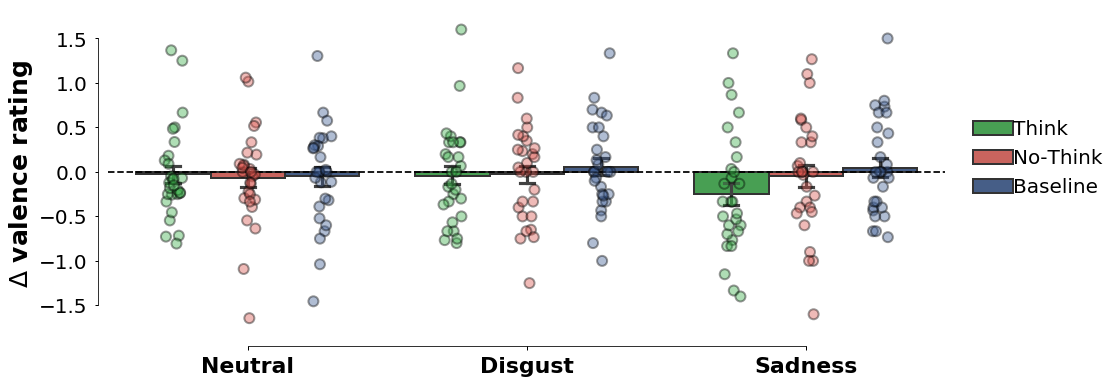

In [32]:
session1 = emotion[(emotion.Group == 1) & (emotion.Session == 1)]
session2 = emotion[(emotion.Group == 1) & (emotion.Session == 2)]

# Compute difference
session2['Difference'] = np.asarray(session2.Valence) - np.asarray(session1.Valence)
# Plot
plot_emotion(session2, group = 1)

### ANOVA

In [33]:
%%R -i session2 -o stats

# ANOVA
stats = aov_ez(session2,                           
                id="Subject",                     
                dv="Difference",                         
                within=c("Emotion", "Condition"))
stats

Anova Table (Type 3 tests)

Response: Difference
             Effect          df  MSE    F  ges p.value
1           Emotion 1.70, 45.87 0.55 0.28 .003     .72
2         Condition 1.95, 52.57 0.29 1.17 .008     .32
3 Emotion:Condition 3.63, 98.10 0.23 0.93 .010     .44
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


## Group 2

/home/legrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


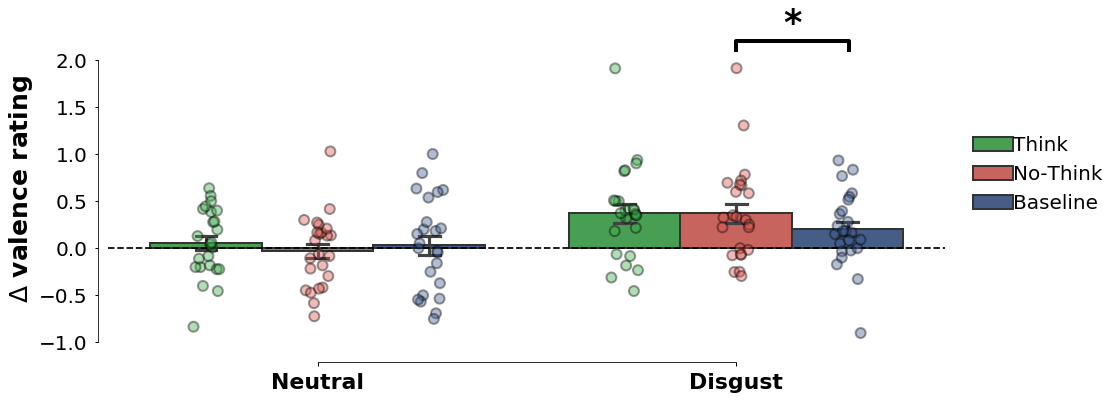

In [36]:
session1 = emotion[(emotion.Group == 2) & (emotion.Session == 1)]
session2 = emotion[(emotion.Group == 2) & (emotion.Session == 2)]

# Compute difference
session2['Difference'] = np.asarray(session2.Valence) - np.asarray(session1.Valence)
# Plot
plot_emotion(session2, group = 2)

## ANOVA

In [37]:
%%R -i session2 -o stats

# ANOVA
stats = aov_ez(session2,                           
                id="Subject",                     
                dv="Difference",                         
                within=c("Emotion", "Condition"))
stats

Anova Table (Type 3 tests)

Response: Difference
             Effect          df  MSE       F  ges p.value
1           Emotion       1, 23 0.32 9.78 **  .10    .005
2         Condition 1.97, 45.38 0.08    1.43 .009     .25
3 Emotion:Condition 1.94, 44.63 0.12    1.42  .01     .25
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Sphericity correction method: GG 


## t test

In [38]:
%%R -i session2

NT = filter(session2, Condition == 'Baseline', Emotion == 'Neutral')$Difference
BA = filter(session2, Condition == 'No-Think', Emotion == 'Neutral')$Difference

print(t.test(NT, BA, paired = T), alternative = 'greater')
print(cohen.d(NT, BA, method = 'paired'))


	Paired t-test

data:  NT and BA
t = 0.74364, df = 23, p-value = 0.4646
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1127090  0.2392212
sample estimates:
mean of the differences 
             0.06325607 


Cohen's d

d estimate: 0.1421071 (negligible)
95 percent confidence interval:
       inf        sup 
-0.4396987  0.7239130 
